# Handwritten Digit Recognition

## Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt

from matplotlib import image as img

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.activations import linear, sigmoid, relu

from tensorflow.keras.losses import SparseCategoricalCrossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.regularizers import l2

from tensorflow.nn import softmax

from sklearn.model_selection import train_test_split

## Loading Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(f"Train images : {x_train.shape}")
print(f"Train labels : {y_train.shape}")

print(f"Test images : {x_test.shape}")
print(f"Test labels : {y_test.shape}")

Train images : (60000, 28, 28)
Train labels : (60000,)
Test images : (10000, 28, 28)
Test labels : (10000,)


## Hovering over the data

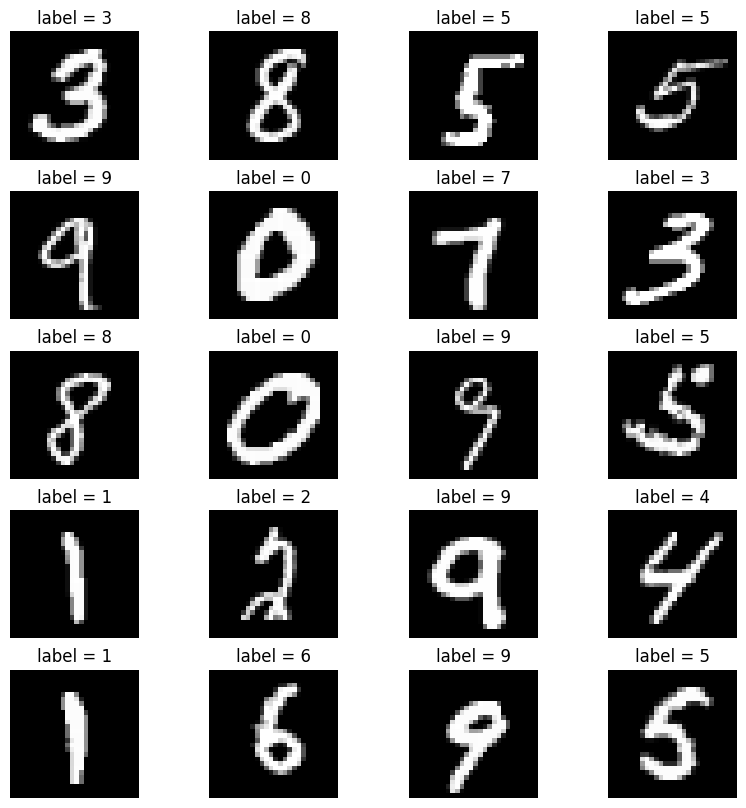

In [4]:
# visualizing any random 20 training example

fig, axes = plt.subplots(5, 4, figsize=(8,8))

fig.tight_layout(pad=0.15) #[left, bottom, right, top]

m = x_train.shape[0]

for i,ax in enumerate(axes.flat) :
    
    random_index = np.random.randint(m)
    
    an_example = x_train[random_index]
    
    ax.imshow(an_example, cmap = 'gray')
    
    ax.set_title(f"label = {y_train[random_index]}")
        
    ax.set_axis_off()

plt.show()

In [5]:
# we shall also have a look how many times the digits 0-9 are present in the training data

digits, frequency = np.unique(y_train, return_counts=True)

dictionary_1 = {
    'label' : digits,
    'frequency in the training data' : frequency
}

dataframe_1 = pd.DataFrame(dictionary_1)

dataframe_1

,label,frequency in the training data
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


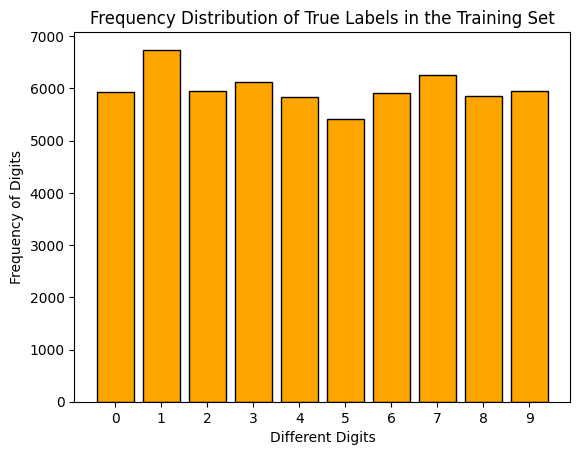

In [6]:
# also a barplot of the training data

plt.bar(digits, frequency, color = 'orange', edgecolor = 'black')

plt.title("Frequency Distribution of True Labels in the Training Set")
plt.xlabel("Different Digits")
plt.ylabel("Frequency of Digits")
plt.xticks(digits, [x for x in range(10)])

plt.show()

## Building a Neural Network Model

Our model will have **7 layers**, consisting of 1 input layer, 5 hidden layers and 1 output layer. We shall also employ **L2 regularization**.

The **input layer** will have **784 neurones.**

**1st hidden layer** will have **120 neurones** with **relu** as the activation function.

**2nd hidden layer** will have **90 neurones** with **relu** as the activation function.

**3rd hidden layer** will have **80 neurones** with **relu** as the activation function.

**4th hidden layer** will have **50 neurones** with **relu** as the activation function.

**5th hidden layer** will have **30 neurones** with **relu** as the activation function.

The **output layer** will have **10 neurones** with **softmax** function as the activation function.

In [7]:
model_1 = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=120, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(units=90, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(units=80, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(units=50, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(units=10, activation='softmax')
    ])

## Fitting the Model

In [8]:
model_1.compile(optimizer = Adam(learning_rate = 0.001),
                loss = SparseCategoricalCrossentropy())

model_1.fit(x_train.reshape(60000, 784), y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 14s 6ms/step - loss: 2.8314
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8056
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4625
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3971
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3764
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3585
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3436
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3418
Epoch 9/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3300
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3259
Epoch 11/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3265
Epoch 12/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3

### Accuracy on Test Set

In [9]:
def accuracy(yhat, true) :
    
    p = len(true)
    
    correct = 0
    
    for i in range(p) :
        if (yhat[i] == true[i]) :
            correct += 1
    
    percentage = (correct / p) * 100
    
    return percentage

In [10]:
a = x_test.shape[0]

output_on_test_set = model_1.predict(x_test.reshape(10000, 784))

yhat = np.zeros(a)

for i in range(a) :
    yhat[i] = np.argmax(output_on_test_set[i])

percentage = accuracy(yhat, y_test)

print(f"Accuracy of the model on test set = {percentage}%")

313/313 [==============================] - 1s 3ms/step
Accuracy of the model on test set = 96.05%


## Predictions

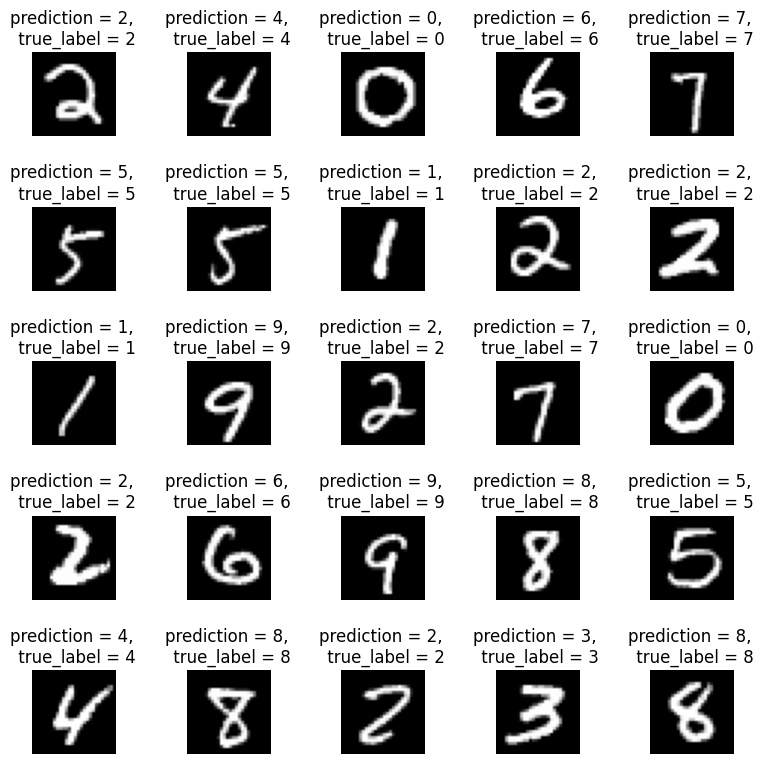

In [11]:
fig, axes = plt.subplots(5, 5, figsize = (8, 8))

plt.tight_layout(pad=2)

for i, ax in enumerate(axes.flat) :
    
    random_index = np.random.randint(x_test.shape[0])

    model_output = model_1.predict(x_test[random_index].reshape(1, 784), verbose=0) # verbose = 0 is for omitting the progress

    yhat = np.argmax(model_output)

    ax.imshow(x_test[random_index], cmap = 'gray')

    ax.axis('off')

    ax.set_title(f"prediction = {yhat}, \n true_label = {y_test[random_index]}")

plt.show()